# Simple linear regression on World war 2(Weather report)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data set

In [5]:
climate =pd.read_csv(r'C:\Users\HP\Desktop\Learning\ML\Data Science\Temperature Prediction\Summary of Weather.csv')

In [6]:
climate.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning the Dataset

In [7]:
climate.Snowfall.unique()

array([0.0, nan, '0', '22.86', '33.02', '30.48', '2.54', '5.08', '10.16',
       '7.62', '20.32', '15.24', '17.78', '12.7', '25.4', '27.94',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [8]:
nan_cols = climate.isnull().sum() / len(climate)*100 
drop_cols = nan_cols[nan_cols>=50].index.to_list()
drop_cols

['WindGustSpd',
 'PoorWeather',
 'DR',
 'SPD',
 'SND',
 'FT',
 'FB',
 'FTI',
 'ITH',
 'PGT',
 'TSHDSBRSGF',
 'SD3',
 'RHX',
 'RHN',
 'RVG',
 'WTE']

In [9]:
climate.drop(drop_cols,inplace=True,axis=1)

In [10]:
nan_cols = climate.isnull().sum() / len(climate)*100
nan_cols = nan_cols.index.to_list()

In [11]:
obj_cols = climate.select_dtypes('object').columns.to_list()
obj_cols

['Date', 'Precip', 'Snowfall', 'PRCP', 'SNF']

In [12]:
obj_cols.remove('Date')

In [13]:
obj_cols

['Precip', 'Snowfall', 'PRCP', 'SNF']

In [14]:
climate[obj_cols] = climate[obj_cols].apply(pd.to_numeric, errors='coerce')

In [15]:
climate.Date = pd.to_datetime(climate.Date)

In [16]:
climate.fillna(climate.mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_19968/3254575839.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  climate.fillna(climate.mean(),inplace=True)


In [17]:
climate['year'] = climate.Date.dt.year
climate['quarter'] = climate.Date.dt.quarter
climate['month'] = climate.Date.dt.month
climate['week'] = climate.Date.dt.week
climate['day'] = climate.Date.dt.day

C:\Users\HP\AppData\Local\Temp/ipykernel_19968/1969335519.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  climate['week'] = climate.Date.dt.week


In [18]:
# climate.corr()[(abs(climate.corr()) > 0.8)]
climate.corr()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,year,quarter,month,week,day
STA,1.000000,0.012274,0.092371,0.059319,0.078112,-0.058259,0.121408,-0.008592,0.000903,0.012229,0.083798,0.050715,0.069647,-0.058259,0.121408,-0.009250,-0.008592,-0.008626,0.000903
Precip,0.012274,1.000000,-0.002804,0.089561,0.043855,-0.009683,0.003927,0.038246,0.000751,0.998986,-0.003676,0.092629,0.045437,-0.009683,0.003927,0.038942,0.038246,0.038884,0.000751
MaxTemp,0.092371,-0.002804,1.000000,0.878384,0.969048,-0.324361,0.039585,0.031346,-0.005130,-0.006097,0.945683,0.826363,0.915625,-0.324361,0.039585,0.034058,0.031346,0.028924,-0.005130
MinTemp,0.059319,0.089561,0.878384,1.000000,0.965425,-0.309966,-0.020733,0.069078,-0.002576,0.087427,0.841824,0.963390,0.931191,-0.309966,-0.020733,0.071882,0.069078,0.066953,-0.002576
MeanTemp,0.078112,0.043855,0.969048,0.965425,1.000000,-0.325965,0.010681,0.050769,-0.004153,0.040976,0.919436,0.917804,0.949449,-0.325965,0.010681,0.053577,0.050769,0.048420,-0.004153
Snowfall,-0.058259,-0.009683,-0.324361,-0.309966,-0.325965,1.000000,-0.000885,-0.044750,-0.000270,-0.010122,-0.342709,-0.321490,-0.343148,1.000000,-0.000885,-0.046531,-0.044750,-0.044202,-0.000270
YR,0.121408,0.003927,0.039585,-0.020733,0.010681,-0.000885,1.000000,-0.144360,-0.011196,0.000951,0.013915,-0.043109,-0.014646,-0.000885,1.000000,-0.141014,-0.144360,-0.146500,-0.011196
MO,-0.008592,0.038246,0.031346,0.069078,0.050769,-0.044750,-0.144360,1.000000,0.006563,0.037506,0.034269,0.072338,0.054747,-0.044750,-0.144360,0.971083,1.000000,0.974278,0.006563
DA,0.000903,0.000751,-0.005130,-0.002576,-0.004153,-0.000270,-0.011196,0.006563,1.000000,0.000998,-0.003292,-0.000738,-0.002090,-0.000270,-0.011196,0.008982,0.006563,0.067935,1.000000
PRCP,0.012229,0.998986,-0.006097,0.087427,0.040976,-0.010122,0.000951,0.037506,0.000998,1.000000,-0.007258,0.090427,0.042442,-0.010122,0.000951,0.038259,0.037506,0.038215,0.000998


In [19]:
climate.drop(columns=['MAX','MIN','MEA','PRCP','Date'],inplace=True)

In [20]:
climate.dtypes

STA           int64
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall    float64
YR            int64
MO            int64
DA            int64
SNF         float64
year          int64
quarter       int64
month         int64
week          int64
day           int64
dtype: object

In [21]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Precip    119040 non-null  float64
 2   MaxTemp   119040 non-null  float64
 3   MinTemp   119040 non-null  float64
 4   MeanTemp  119040 non-null  float64
 5   Snowfall  119040 non-null  float64
 6   YR        119040 non-null  int64  
 7   MO        119040 non-null  int64  
 8   DA        119040 non-null  int64  
 9   SNF       119040 non-null  float64
 10  year      119040 non-null  int64  
 11  quarter   119040 non-null  int64  
 12  month     119040 non-null  int64  
 13  week      119040 non-null  int64  
 14  day       119040 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 13.6 MB


In [22]:
climate.head()

,STA,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,SNF,year,quarter,month,week,day
0,10001,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.0,1942,3,7,27,1
1,10001,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.0,1942,3,7,27,2
2,10001,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.0,1942,3,7,27,3
3,10001,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.0,1942,3,7,27,4
4,10001,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.0,1942,3,7,27,5


# Plotting 

# Data visualization

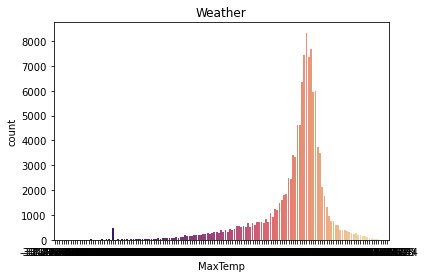

In [23]:
sns.countplot(x = 'MaxTemp', data = climate, palette = 'magma')
plt.title('Weather')
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

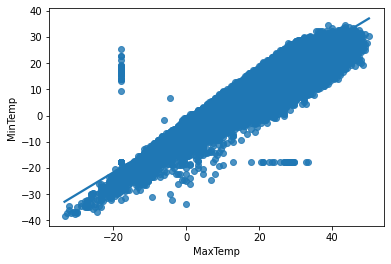

In [24]:
sns.regplot(x="MaxTemp", y="MinTemp", data=climate)

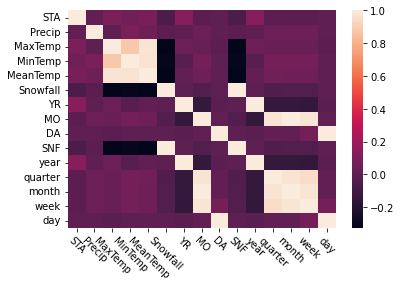

In [26]:
sns.heatmap(climate.corr());
plt.xticks(rotation=-45);

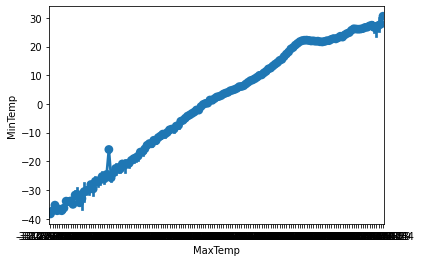

In [27]:
sns.pointplot(x="MaxTemp", y="MinTemp", data=climate)
plt.show()

<AxesSubplot:xlabel='MaxTemp', ylabel='count'>

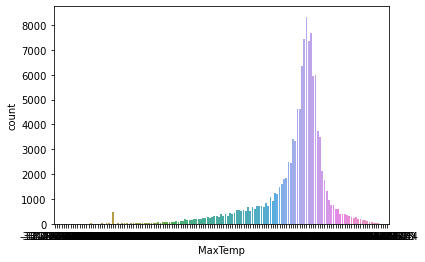

In [28]:
sns.countplot(x='MaxTemp',data=climate)

<AxesSubplot:xlabel='MinTemp', ylabel='count'>

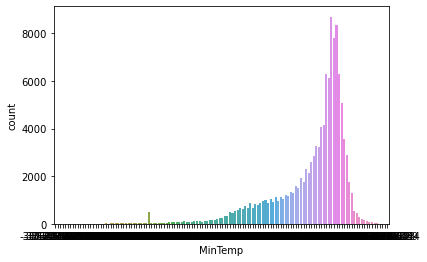

In [29]:
sns.countplot(x='MinTemp',data=climate)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MinTemp'>

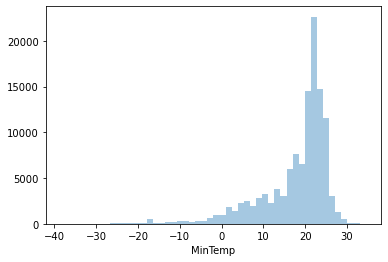

In [30]:
sns.distplot(climate['MinTemp'],kde = False)

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

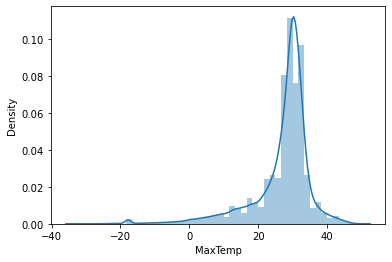

In [31]:
sns.distplot(climate['MaxTemp'])

In [32]:
y =climate['MaxTemp'].values

In [33]:
X = climate.loc[:, climate.columns != 'MaxTemp'].values

## Splitting the dataset into train and test

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

###  Importing linear regression model from sklearn  to train the simple regression model

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### Prediction of  the  results

In [36]:
y_pred= regressor.predict(X_test)
print(y_pred)

[29.6479114  31.04667843 27.19895687 ... 31.70771919 31.59209515
 36.83701687]


## Accuracy score

In [37]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9879548437764439

## KNN

In [40]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 3)

### Test Train Split

In [48]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.5,random_state=0)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Prediction

In [50]:
pred = model.predict(X_test)

### Score

In [51]:
r2_score(pred,y_test)

0.958387640735383

## Gradient Boosting Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

## Train Test spilt

In [55]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size = 3,random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

## Prediction

In [57]:
grb_pred = gbr.predict(X_test)

### Score

In [59]:
r2_score(grb_pred,y_test)

0.8697418457175728